# Experiment 8 - Introduction to Computer Vision

Computer vision is a multidisciplinary field that enables machines to interpret and
understand visual data, such as images and videos. In this experiment, we explore
different fields of computer vision, starting with basics of image manipulation, and
going to more advanced problems such as object recognition and detection. We will
mainly use OpenCV, Scikit-learn, and PyTorch Python packages for the procedure
of this experiment. Parts of this experiment is based on PyTorch tutorials.

# 1.1 Image processing and manipulation with OpenCV
In this part, we will gain a foundational understanding of image processing and manipulation using the OpenCV library in Python. To install the OpenCV library, you
can use the following command

```
$ pip install opencv-python
```

In the following sections, we will use the Birzeit University campus picture shown
in Figure 1.1 as an example. To download the picture you can use the command

In the following sections, we will use the Birzeit University campus picture shown
in Figure 1.1 as an example. To download the picture you can use the command

```
$ wget https://www.birzeit.edu/sites/default/files/buildings.jpg
```
Kindly note that if you are running the commands above in google colab, then you
need to add ! at the beginning of the command.

In [44]:
! wget https://www.birzeit.edu/sites/default/files/buildings.jpg

--2024-08-10 15:24:07--  https://www.birzeit.edu/sites/default/files/buildings.jpg
Resolving www.birzeit.edu (www.birzeit.edu)... 104.22.8.107, 104.22.9.107, 172.67.38.181, ...
Connecting to www.birzeit.edu (www.birzeit.edu)|104.22.8.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258627 (253K) [image/jpeg]
Saving to: ‘buildings.jpg.4’

buildings.jpg.4     100%[===================>] 252.57K  --.-KB/s    in 0.007s  

2024-08-10 15:24:07 (37.0 MB/s) - ‘buildings.jpg.4’ saved [258627/258627]



# Loading and displaying an image

To load the image we downloaded to numpy array and display it, use the following
code

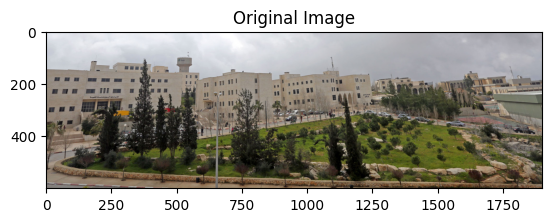

In [45]:
import cv2 as cv
import matplotlib.pyplot as plt


# Load an image
image = cv.imread('buildings.jpg')
# Display the image

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

Task 1: What is the shape of the loaded image? What does each dimension represent?

In [46]:
image.shape

(600, 1900, 3)

image shape is  (600, 1900, 3), width, length, and number of channels respesctively

Task 2: repeat the previous code but now pass the image directly to plt.imshow().
I.e., without using cv.cvtColor(). Do you notice any difference? Why?

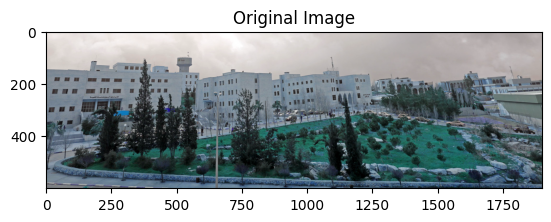

In [47]:
import cv2 as cv
import matplotlib.pyplot as plt


# Load an image
image = cv.imread('buildings.jpg')
# Display the image

plt.imshow(image)
plt.title('Original Image')
plt.show()

#BGR TO RGB

We can notice that green color still the same, but blue, and red were replaced with each other, that's due the **cvtColo** function. By default, **imread** loads the image in BGR order, and **plt.show**, uses the RGB, so if we don't use the convert function, Blue channel will replace red and vice versa, but reen stays the same.

## Grayscale conversion
To convert the image in the previous section into grayscale, use the code below

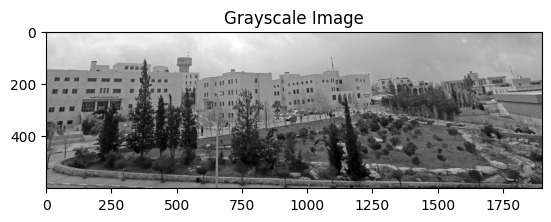

In [48]:
# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

Task 3: What is the shape of the gray image? What does each dimension represent?

In [49]:
gray_image.shape

(600, 1900)

Yes, The shape changed to (600,1900) that means, only one channel instead of 3 in the colored image.

## Image transformation
Run the code below which applies some transformations on the image. Try to explain
each of the applied transformations

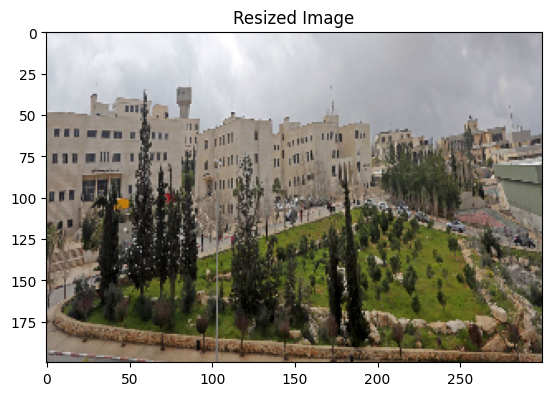

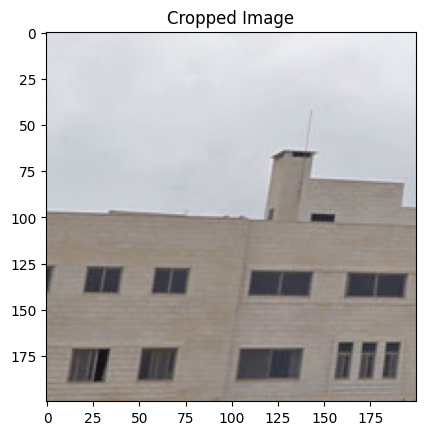

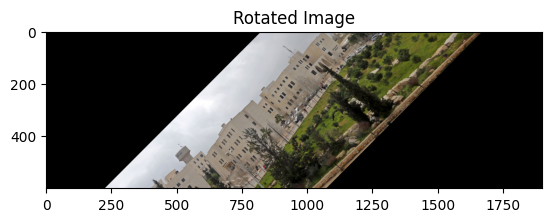

In [50]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Resize and crop the image
resized_image = cv.resize(image, (300, 200))
cropped_image = image[50:250, 50:250]

# Rotate the image
rows, cols = image.shape[:2]
M = cv.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))

# Display the transformed images
plt.imshow(resized_image)
plt.title('Resized Image')
plt.show()
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

* First Transformation was resiziing, resizes the image into specific dimensions
* Second Transformation was cropping the image from with coordinates given
* Third Transformation was rotation, first we find the rotaion matrix of a specific angle, and center of the rotaion, and then apply this rotation matrix to the original image  and we get our rotated image.

Task 4: Rotate the original image by 10 degrees counter-clockwise around the upper-
left corner of the image

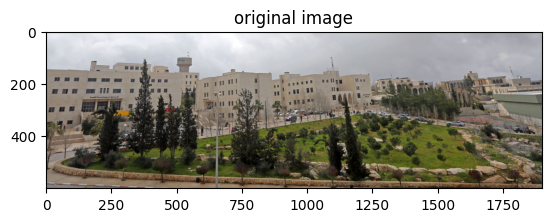

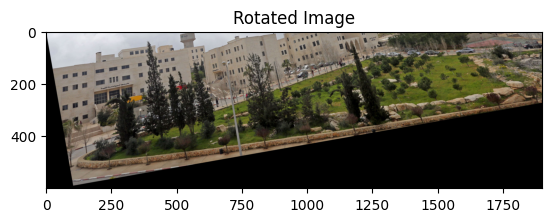

In [51]:

# Rotate the image
rows, cols = image.shape[:2]
M = cv.getRotationMatrix2D((0, 0), 10, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))


plt.imshow(image)
plt.title('original image')
plt.show()
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

M = cv.getRotationMatrix2D((0, 0), 10, 1)
(0,0): are the center of the rotation which is the top-left corner
10: is the degrees
1: is the scale factor, but since we don't have scaling here so it's 1


## Gaussian blurring
Gaussian blurring is used to reduce the noise in the image. However, it also affects the
details of the input image. The basic idea is to convolve the image with a Gaussian
kernel, which is a 2D bell-shaped function. The following code can be used to apply
Gaussian blurring

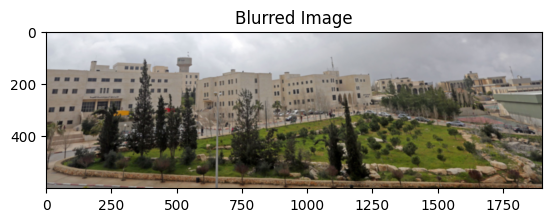

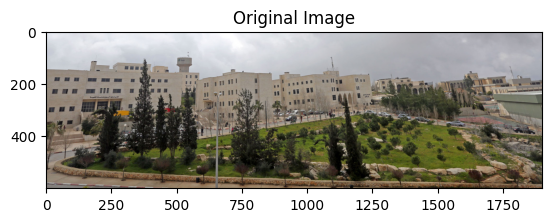

In [52]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (7, 7), 0)
# Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()
plt.imshow(image)
plt.title('Original Image')
plt.show()

Task 5: What does (7, 7) in the previous code represent? try to increase this value,
what do you notice?

(7,7) is the kernel size of the gaussian filter, if we increase the kernel size  the image becomes more blurred, due to the increase of the affecting pixels around, but also it's more costy.

## Edge detection
To detect edges in the image, run the following code

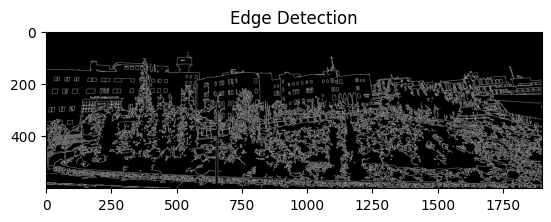

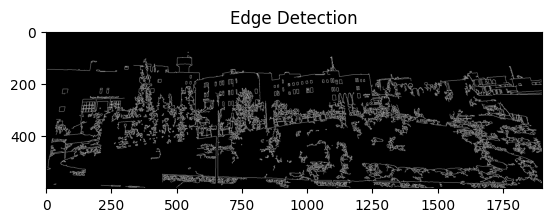

In [59]:
# Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 200)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

edges = cv.Canny(gray_image, 50, 500)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()




Task 6: Explain the parameters of cv.Canny(). How do they affect the results?:

cv.Canny() parameters used in our case are:
* image: which is the image that the filter will be applied to
* lower_threshold: which indicates the lower threshold: if  the edge value is less than the lower_threshold it will not be considered as an edge, so it detects the sensitive edges, the less the value the more sensitive to weak edges
* upper_threshold  which indicates the upper threshold: if  the edge value is higher than the upper_threshold it will not be considered as an edge, so it detects the strong edges,  the higher the value the  more strong edges will be detected


# 1.2 Image Classification / Object Recognition
Image classification is a fundamental task in computer vision. The goal of image
classification is to assign a single label for an input image. Typically, the image
contains only one object, and the goal is to recognize which object is depicted in the
image.
For this lab, we will use the CIFAR10 dataset, which is a standard benchmark for im-
age classification. The dataset consists of 10 classes: ‘airplane’, ‘automobile’, ‘bird’,
‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. Each image in CIFAR10 are of size
3 × 32 × 32, i.e. 3-channel color images of of size 32 × 32 pixels.

## 1.2.1Image classification with MLP
In this section, we will train an MLP classifier on CIFAR10 dataset. Let’s start by
loading the dataset. Luckiley, PyTorch has a package called torchvision, that has
data loaders for common datasets including CIFAR10, and data transformers for im-
ages torchvision.datasets and torch.utils.data.DataLoader.
## Loading images
The first step is to load and normalize the CIFAR10 training and test images using
torchvision.

In [54]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:01<00:00, 96624919.75it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


The output of torchvision datasets are PILImage images of range [0, 1]. We transform
them to Tensors of normalized range [-1, 1]. The following code shows some of the
training images.

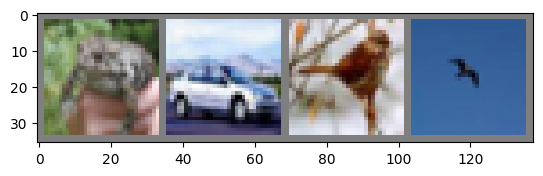

frog  car   bird  bird 


In [55]:
import matplotlib.pyplot as plt
import numpy as np
# functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

The output of torchvision datasets are PILImage images of range [0, 1]. We transform
them to Tensors of normalized range [-1, 1]. The following code shows some of the
training images.

Task 7: Explain the effect of the following transforms transforms.ToTensor(), and
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).
Task 8: What is the purpose of the following line: np.transpose(npimg, (1, 2, 0))?

Defining the network
Let’s define a simple MLP. This network is the same as the MLP from experiment 7,
except for the input layer, which has more inputs.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(3072, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 10)
  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net.to(device)

## Define a Loss function and optimizer
Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train the network

In [55]:
net.train()
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    6# zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /
      2000:.3f}')
      running_loss = 0.0
    print('Finished Training')

## Test the network on the test data
We have trained the network for 2 passes over the training dataset. But we need to
check if the network has learnt anything at all.
We will check this by predicting the class label that the neural network outputs, and
checking it against the ground-truth. If the prediction is correct, we add the sample
to the list of correct predictions.

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()
with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Task 9: For the first layer in the MLP (self.fc1 = nn.Linear(3072, 64) ), what does
the number 3072 represent?

In [56]:
import numpy as np